# TASK 4.9 Part 2 Answers

## Importing libraries, df_ords-prods_custs_final and checking outcome

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'/Users/stefaniadaskalaki/Google Drive/CF4.2 Instacart Basket Analysis'

In [3]:
df_ords_prods_custs_final=pd.read_pickle(os.path.join(path, '02. Data', '02. Prepared Data', 'ords_prods_custs_final.pkl'))

In [4]:
df_ords_prods_custs_final.shape

(32404859, 34)

In [5]:
df_ords_prods_custs_final.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,exists
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## Creating a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

### Creating and saving a bar chart

In [12]:
# change numbers to day names 

df_ords_prods_custs_final.loc[df_ords_prods_custs_final['order_day_of_week']==0,'order_day'] = 'Saturday'
df_ords_prods_custs_final.loc[df_ords_prods_custs_final['order_day_of_week']==1,'order_day'] = 'Sunday'
df_ords_prods_custs_final.loc[df_ords_prods_custs_final['order_day_of_week']==2,'order_day'] = 'Monday'
df_ords_prods_custs_final.loc[df_ords_prods_custs_final['order_day_of_week']==3,'order_day'] = 'Tuesday'
df_ords_prods_custs_final.loc[df_ords_prods_custs_final['order_day_of_week']==4,'order_day'] = 'Wednesday'
df_ords_prods_custs_final.loc[df_ords_prods_custs_final['order_day_of_week']==5,'order_day'] = 'Thursday'
df_ords_prods_custs_final.loc[df_ords_prods_custs_final['order_day_of_week']==6,'order_day'] = 'Friday'

In [13]:
df_ords_prods_custs_final.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,date_joined,n_dependants,fam_status,income,exists,order_day
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Monday
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday
2,473747,1,3,3,12,21.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday
4,431534,1,5,4,15,28.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday


Text(0.5, 1.0, 'Orders per Weekday')

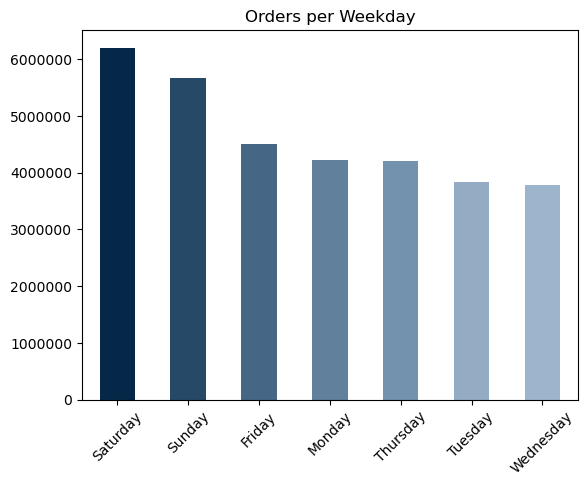

In [16]:
task_bar=df_ords_prods_custs_final['order_day'].value_counts().plot.bar(color =['#052848', '#274968','#456685', '#61809B', '#7392AE', '#93ACC3', '#9CB5CC'])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45)
plt.title('Orders per Weekday')

In [17]:
# exporting the chart

task_bar.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'ord_days.png'))

## Creating a Histogram for the 'prices' column

<AxesSubplot:ylabel='Frequency'>

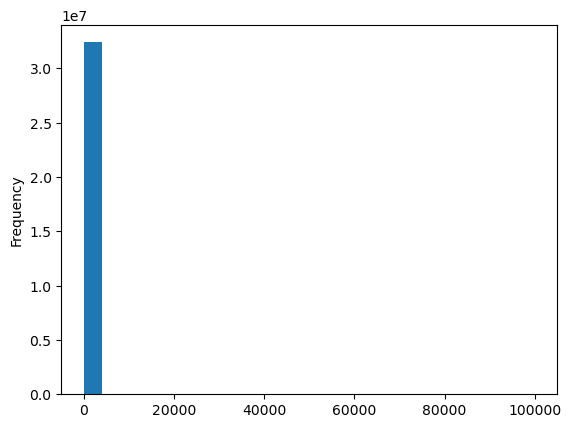

In [18]:
df_ords_prods_custs_final['prices'].plot.hist(bins = 25)

something doesn't look good. Doing some statistical checks on the column 'prices' to see what has happened

In [19]:
df_ords_prods_custs_final['prices'].describe()

count    3.240486e+07
mean     1.021125e+01
std      4.956361e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

I will also perform separate checks on each descriptive as this doesn't show us something

In [20]:
df_ords_prods_custs_final['prices'].mean()

10.211251258850098

In [21]:
df_ords_prods_custs_final['prices'].median()

7.400000095367432

In [22]:
df_ords_prods_custs_final['prices'].min()

1.0

In [23]:
df_ords_prods_custs_final['prices'].max()

99999.0

an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram we see above

### Creating scatterplot to identify any outliers

<AxesSubplot:xlabel='prices', ylabel='prices'>

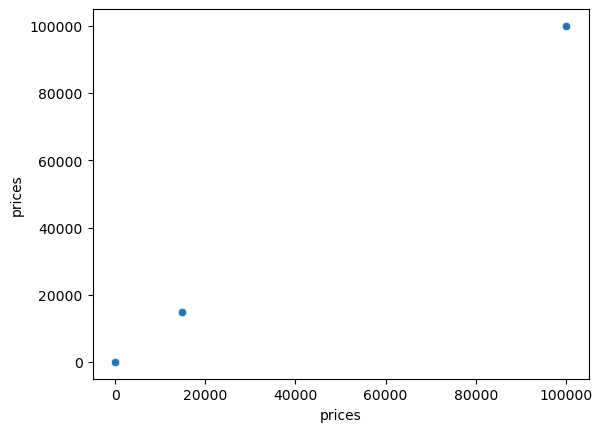

In [24]:
sns.scatterplot(x = 'prices', y = 'prices',data= df_ords_prods_custs_final)

The mean of the column is around 12, so you’d expect the data points to be distributed somewhere around this number. However, there are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000. This close to 100,000 value corresponds to the max value you identified in your checks. But what about the close-to-20,000 value? To investigate this, you can run a few more exploratory checks on your data.

Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. If you imagined the maximum price anyone would pay in a supermarket were around $100, then anything above that amount could be considered an outlier. Run this check via the following code:

In [25]:
df_ords_prods_custs_final.loc[df_ords_prods_custs_final['prices']> 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,date_joined,n_dependants,fam_status,income,exists,order_day
7805,1435153,1519,26,2,11,6.0,False,21553,15,0,...,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both,Monday
7806,1066435,1519,32,3,10,5.0,False,21553,28,1,...,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both,Tuesday
15143,1697208,2409,33,1,19,5.0,False,21553,1,0,...,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,both,Sunday
20264,965345,3531,27,2,19,8.0,False,33664,2,0,...,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,both,Monday
20497,2943740,3793,1,2,9,NaN,True,21553,3,0,...,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,both,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,False,33664,2,1,...,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,both,Sunday
32307882,1179092,131671,12,4,9,15.0,False,33664,1,0,...,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,both,Wednesday
32310810,1226705,39667,7,2,15,20.0,False,33664,14,0,...,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,both,Monday
32330048,3000037,95105,2,4,19,22.0,False,33664,4,0,...,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both,Wednesday


there are 5,127 rows with outlier observations (prices greater than $100). In addition, at the top of the “prices” column, you can see that there’s another odd value, $14,900.00, which corresponds to the second unexplainable point in the scatterplot. Following this is the $99,999.00 you identified previously. As such, you can assume that it’s the $14,900.00 and $99,999.00 values that are skewing your charts.

### Mark the outliers values in NaN & checking outcome

In [29]:
df_ords_prods_custs_final.loc[df_ords_prods_custs_final['prices']>100, 'prices'] = np.nan

In [30]:
df_ords_prods_custs_final['prices'].max()

25.0

### Creating again the histogram after fixing the outliers & saving it


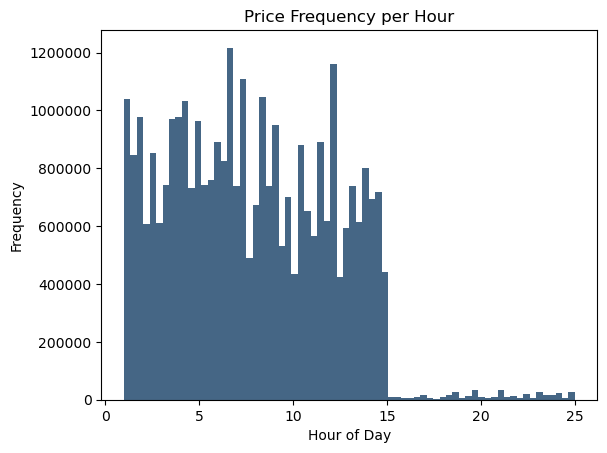

In [31]:
task_hist=df_ords_prods_custs_final['prices'].plot.hist(bins = 70, color =['#456685'])
plt.title('Price Frequency per Hour')
plt.xlabel('Hour of Day')
plt.ticklabel_format(style='plain', axis='y')

## Splitting the df to two sample dfs to avoid memory crash so i can create a line chart

### Creating a list holding True/False values to the test np.random.rant( ) <=0.7  

In [32]:
dev = np.random.rand(len(df_ords_prods_custs_final)) <=0.7

### Splitting the df in two 
70 percent of the dataframe in the big sample and 30 percent of the dataframe in the small sample
For every value in the list that’s False , the corresponding row in your dataframe will be stored in the small sample

#### Storing 70% of the sample in the df Big

In [33]:
big_task= df_ords_prods_custs_final[dev]

#### Storing 30% of the sample in the df Big

In [34]:
small_task= df_ords_prods_custs_final[~dev]

### Checking the outcome of the split

In [35]:
len(df_ords_prods_custs_final)

32404859

In [36]:
len(big_task)+len(small_task)

32404859

## Reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week'

In [39]:
df_task=small_task[['order_day','prices']]

## Creating line chart and saving it as 'task_line' in the df_task
The blue line, then, represents how prices differ depending on the day of the week

Text(0.5, 1.0, 'Price per Weekday')

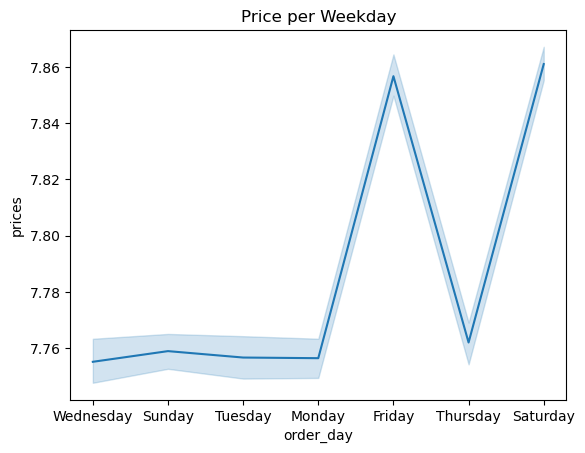

In [41]:
task_line = sns.lineplot(data = df_task, x = 'order_day',y = 'prices')
plt.title('Price per Weekday')

In [ ]:
# exporting the chart

task_line.figure.savefig(os.path.join(path, '04. Analysis', '01. Visualisations', 'price_day.png'))

## 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

In [42]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

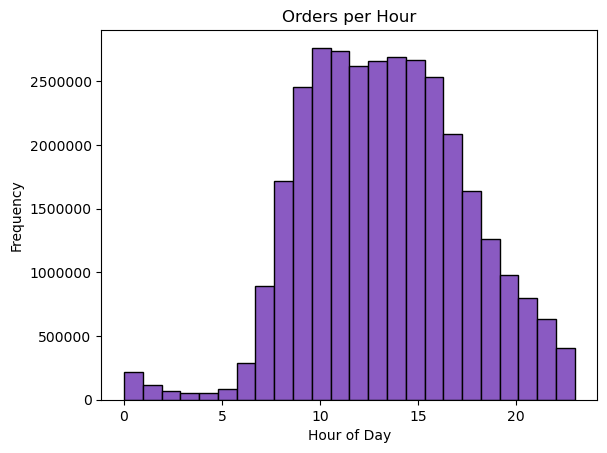

In [47]:
color1 = "#8A5AC2"
color2 = "#3575D5"

df_ords_prods_custs_final['order_hour_of_day'].plot.hist(bins = 24, edgecolor = "black", color = get_color_gradient(color1, color2, len(df_ords_prods_custs_final['order_hour_of_day'])))
plt.title('Orders per Hour')
plt.xlabel('Hour of Day')
plt.ticklabel_format(style='plain', axis='y')

The hours 9am-5pm are the busiest times for customers ordering through the app with 10am the top performing. After 5pm the orders' frequency drops gradually. The slowest times are 1-5am. Interestingly there is a small spike at midnight for the night-owl-shoppers!

## 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

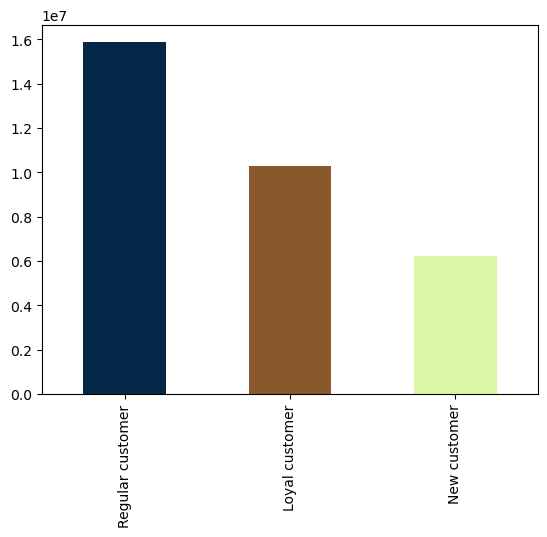

In [25]:
task_bar_loyalty=df_ords_prods_custs_final['loyalty_flag'].value_counts().plot.bar(color =['#052848', '#89582B','#DAF7A6'])

## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

### Reducing the samples to only those columns necessary for the chart, namely “prices” and “orders_hour_of_week'

In [26]:
df_task_2=small_task[['order_hour_of_day','prices']]

In [27]:
df_task_2.head()

,order_hour_of_day,prices
6,9,9.0
7,14,9.0
14,7,4.4
22,7,4.7
25,7,3.0


In [28]:
df_task_2.shape

(9715527, 2)

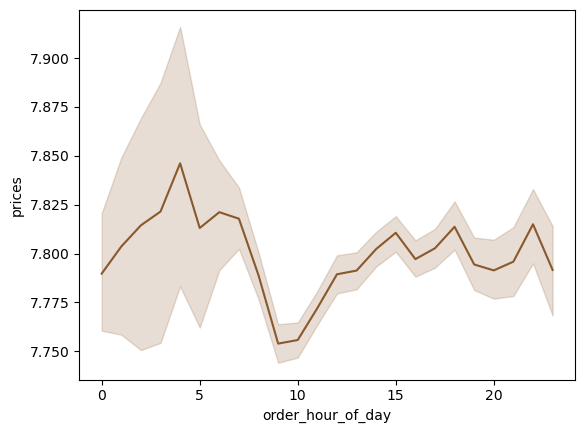

In [29]:
task_line_hour=sns.lineplot(data = df_task_2,x = 'order_hour_of_day',y = 'prices',color='#89582B')

Looking at the above chart comes to a surprise and contradiction to the previous chart. Berfore we saw that the most orders occur between 9am-5pm and here we see that even though we have a lot of orders the prices are very low. The lowest prices occur at the busiest time of the day at 10am! Instead from 12am-5am we have low order frequency but higher price purchasing. 

## 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

### Reducing the samples to only those columns necessary for the chart, namely “age” and “n_dependants'

In [30]:
df_task_3=small_task[['age','n_dependants']]

In [31]:
df_task_3

,age,n_dependants
6,31,3
7,31,3
14,31,3
22,31,3
25,31,3
...,...,...
32404839,25,0
32404842,25,0
32404845,25,0
32404848,25,0


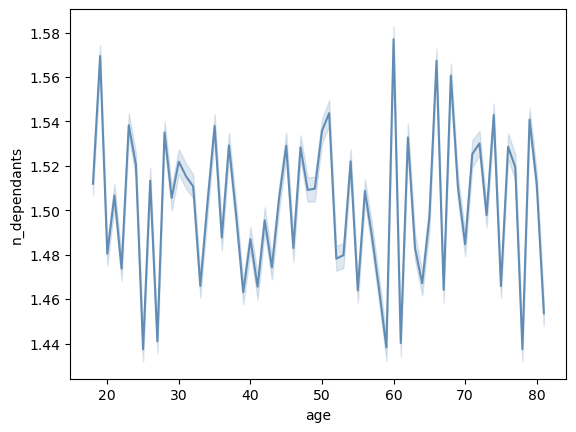

In [32]:
task_line_age_dep=sns.lineplot(data = df_task_3,x = 'age',y = 'n_dependants',color='#618CB4')

It doesn't appear to be some kind of insight that we can derive from this chart

## 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [33]:
df_task_4=small_task[['age','income']]

In [34]:
df_task_4

,age,income
6,31,40423
7,31,40423
14,31,40423
22,31,40423
25,31,40423
...,...,...
32404839,25,53755
32404842,25,53755
32404845,25,53755
32404848,25,53755


In [35]:
df_task_4['income'].min()

25903

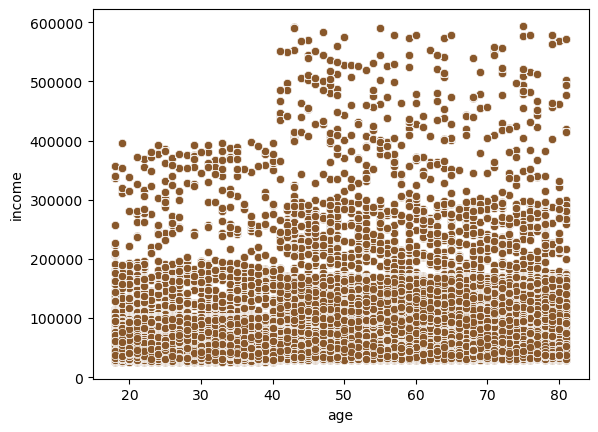

In [36]:
task_scat_age_income=sns.scatterplot(data = df_task_4,x = 'age',y = 'income',color='#89582B')

The income mainly is broken down in two major categories:

1. 20-40 years old => the income is concentrated between 25,903$-200,000$ with a small percentage achieving 200,000$-400,000$
2. 41-81 years old => the income is highly concentrated between 25,903$-199,000$ 
    a slightly smaller concentration but still very significant percentage achieving 199,001$-300,000$
    finally a small percentage in the category earning 301,000$-600,000$

## Exporting visualisations

In [37]:
task_bar.figure.savefig(os.path.join(path, '04. Analysis','01. Visualisations', 'Task', 'task_bar_orders_dow.png'))

In [38]:
task_hist.figure.savefig(os.path.join(path, '04. Analysis','01. Visualisations', 'Task', 'task_hist_price_frequency.png'))

In [39]:
task_line.figure.savefig(os.path.join(path, '04. Analysis','01. Visualisations', 'Task', 'task_line_price_ofw.png'))

In [40]:
task_hist_2.figure.savefig(os.path.join(path, '04. Analysis','01. Visualisations', 'Task',  'task_hist_2_ohd_freq.png'))

In [41]:
task_bar_loyalty.figure.savefig(os.path.join(path, '04. Analysis','01. Visualisations', 'Task', 'task_bar_loyalty_cust.png'))

In [42]:
task_line_hour.figure.savefig(os.path.join(path, '04. Analysis','01. Visualisations', 'Task', 'task_line_hour_price_ohd.png'))

In [43]:
task_line_age_dep.figure.savefig(os.path.join(path, '04. Analysis','01. Visualisations', 'Task', 'task_line_age_dep.png'))

In [44]:
task_scat_age_income.figure.savefig(os.path.join(path, '04. Analysis','01. Visualisations', 'Task', 'task_scat_age_income.png'))